# WSCC 9-bus performance evaluation

Only preprocessed data is used here.

## Performance

In [1]:
import pandas as pd
from dpsim.MeasurementUtils import Measurement
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

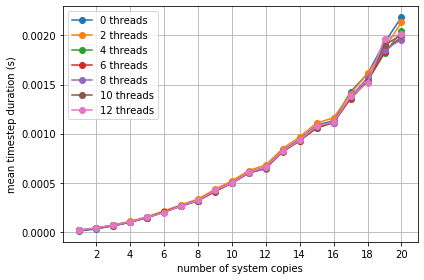

In [2]:
pd_coupled_mean = pd.read_csv('pd_coupled_mean.csv')

ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_coupled_mean.query('threads=='+str(threads))['values'].values, label=str(threads)+' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('9bus_coupled.pdf')
pd_coupled_mean.to_csv('pd_coupled_mean.csv')

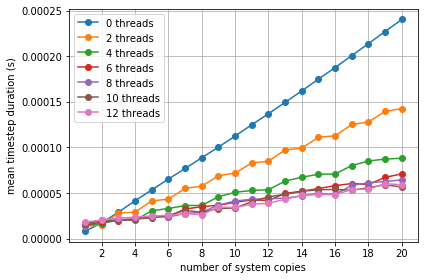

In [3]:
pd_decoupled_mean = pd.read_csv('pd_decoupled_mean.csv')

ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):    
    plt.plot(copies, pd_decoupled_mean.query('threads=='+str(threads))['values'].values, label=str(threads)+' threads', marker='o')

#plt.ylim([0,0.00025])

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('9bus_decoupled.pdf')
pd_decoupled_mean.to_csv('pd_decoupled_mean.csv')

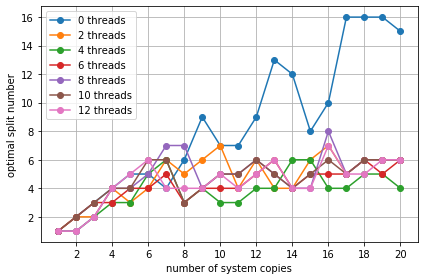

In [5]:
pd_diakoptics_mean_split_min = pd.read_csv('pd_diakoptics_mean_split_min.csv')

ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['splits'].values, label= str(threads) + ' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('optimal split number')
plt.grid()
plt.legend()
plt.tight_layout()

plt.savefig('diakoptics_min_mean_splits.pdf')
pd_diakoptics_mean_split_min.to_csv('pd_diakoptics_mean_split_min.csv')

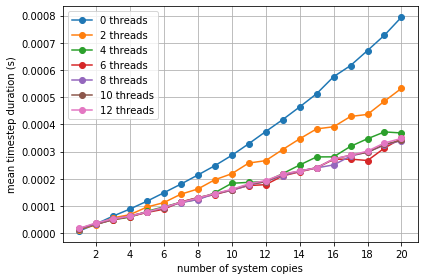

In [11]:
pd_diakoptics_mean_split_min = pd.read_csv('pd_diakoptics_mean_split_min.csv')

ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)

for threads in range(0,13,2):
    plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['values'].values, label= str(threads) + ' threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.tight_layout()

plt.savefig('9bus_diakoptics.pdf')

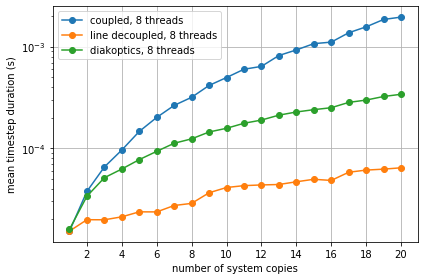

In [12]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
copies = np.arange(1,21)
threads = 8

plt.plot(copies, pd_coupled_mean.query('threads=='+str(threads))['values'].values, label='coupled, 8 threads', marker='o')
plt.plot(copies, pd_decoupled_mean.query('threads=='+str(threads))['values'].values, label='line decoupled, 8 threads', marker='o')
plt.plot(copies, pd_diakoptics_mean_split_min.query('threads=='+str(threads))['values'].values, label='diakoptics, 8 threads', marker='o')

plt.xlabel('number of system copies')
plt.ylabel('mean timestep duration (s)')
plt.grid()
plt.legend()
plt.yscale('log')
plt.tight_layout()

plt.savefig('9bus_comparison.pdf')